## Handling Missing Value

In [3]:
import pandas as pd

data = pd.read_csv("29 building_permit_lat1.csv", sep = ",")

In [13]:
data.shape

(20000, 38)

In [21]:
data.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Name                                object
Street Suffix                              object
Unit                                      float64
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Number of Existing Stories                float64
Number of Proposed Stories                float64
Voluntary Soft-Story Retrofit              object


In [14]:
#check missing value
data.isna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [33]:
data.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                               244
Unit                                      17098
Description                                  32
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                1573
Completed Date                            10315
First Construction Document Date           1575
Number of Existing Stories                 4318
Number of Proposed Stories                 4275
Voluntary Soft-Story Retrofit             19993
Fire Only Permit                        

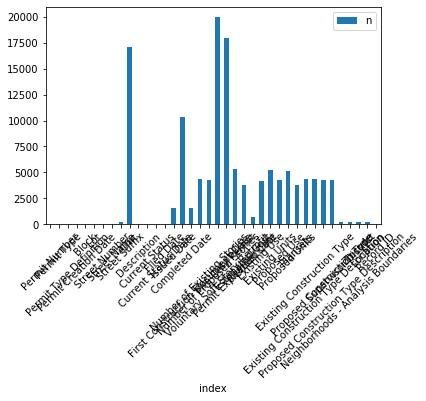

In [25]:
import matplotlib
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [34]:
#drop missing value >60%

data = data.drop(['Completed Date', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Unit'], axis=1)

data.isna().sum()

Permit Number                                0
Permit Type                                  0
Permit Type Definition                       0
Permit Creation Date                         0
Block                                        0
Lot                                          0
Street Number                                0
Street Name                                  0
Street Suffix                              244
Description                                 32
Current Status                               0
Current Status Date                          0
Filed Date                                   0
Issued Date                               1573
First Construction Document Date          1575
Number of Existing Stories                4318
Number of Proposed Stories                4275
Permit Expiration Date                    5295
Estimated Cost                            3821
Revised Cost                               672
Existing Use                              4149
Existing Unit

In [35]:
#kalo pengen semua langsung

data = data.fillna(data.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
data.isna().sum()

Permit Number                                0
Permit Type                                  0
Permit Type Definition                       0
Permit Creation Date                         0
Block                                        0
Lot                                          0
Street Number                                0
Street Name                                  0
Street Suffix                              244
Description                                 32
Current Status                               0
Current Status Date                          0
Filed Date                                   0
Issued Date                               1573
First Construction Document Date          1575
Number of Existing Stories                   0
Number of Proposed Stories                   0
Permit Expiration Date                    5295
Estimated Cost                               0
Revised Cost                                 0
Existing Use                              4149
Existing Unit

In [37]:
#kalo ingin sau per satu kolom
#data['Number of Existing Stories'].fillna((sub2['Number of Existing Stories'].mean()), inplace=True)

In [38]:
#Kalo dengan default value
data['Location'].fillna("unknown", inplace=True)
data.isna().sum()

Permit Number                                0
Permit Type                                  0
Permit Type Definition                       0
Permit Creation Date                         0
Block                                        0
Lot                                          0
Street Number                                0
Street Name                                  0
Street Suffix                              244
Description                                 32
Current Status                               0
Current Status Date                          0
Filed Date                                   0
Issued Date                               1573
First Construction Document Date          1575
Number of Existing Stories                   0
Number of Proposed Stories                   0
Permit Expiration Date                    5295
Estimated Cost                               0
Revised Cost                                 0
Existing Use                              4149
Existing Unit

## Menangani Data Duplicate

In [8]:
contoh = {'Nama':['aji', 'agus', 'salim', 'rahman', 'agus'],
    'Asal' : ['Jakarta', 'Bandung', 'Jember', 'Salatiga', 'Bandung'],
    'Pekerjaan' : ['Dokter', 'Arsitek', 'Pedagang', 'Polisi', 'Arsitek']
}


In [9]:
df = pd.DataFrame(contoh)
df.head()

,Nama,Asal,Pekerjaan
0,aji,Jakarta,Dokter
1,agus,Bandung,Arsitek
2,salim,Jember,Pedagang
3,rahman,Salatiga,Polisi
4,agus,Bandung,Arsitek


In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Nama,Asal,Pekerjaan
0,aji,Jakarta,Dokter
1,agus,Bandung,Arsitek
2,salim,Jember,Pedagang
3,rahman,Salatiga,Polisi


## Melakukan Standardization dan Normalization

In [10]:
#Menghitung nilai z-score dengan standard scaler
from sklearn.preprocessing import StandardScaler
import numpy as np

nilai = pd.read_excel("Exercise 19.xlsx", sheet_name = "nilai")
nilai.head(10)

,nim,kode_mk,uts,uas
0,101621007,KOM100,87,86
1,101621008,KOM100,90,78
2,101621007,EKO100,68,67
3,101621008,EKO100,86,89
4,101621005,MTK100,46,98
5,101621007,MTK100,57,78
6,101621008,MTK100,88,93
7,101621005,MTK201,58,56
8,101621008,MTK201,87,87
9,101621005,EKO200,90,68


In [11]:
nilai['na'] = 0.4*nilai['uts'] + 0.6*nilai['uas']
nilai.head()

In [17]:
#ini bisa dilewat, karena ini hanya untuk pembuktian saja
nilai['rerata_na'] = nilai['na'].mean()
nilai['std_na'] = nilai['na'].std()

nilai.head()

,nim,kode_mk,uts,uas,na,rerata_na,std_na
0,101621007,KOM100,87,86,86.4,79.166667,8.898662
1,101621008,KOM100,90,78,82.8,79.166667,8.898662
2,101621007,EKO100,68,67,67.4,79.166667,8.898662
3,101621008,EKO100,86,89,87.8,79.166667,8.898662
4,101621005,MTK100,46,98,77.2,79.166667,8.898662


In [23]:
#mulai memanggil standarscaler dan memasukkan data ke dalam fungsi scaler

scaler = StandardScaler()
y = np.array(nilai['na']).reshape(-1,1)

scaler.fit(y)

In [31]:
nilai['standar_na'] = scaler.transform(y)

nilai.head()

,nim,kode_mk,uts,uas,na,rerata_na,std_na,standar_na
0,101621007,KOM100,87,86,86.4,79.166667,8.898662,0.822709
1,101621008,KOM100,90,78,82.8,79.166667,8.898662,0.413250
2,101621007,EKO100,68,67,67.4,79.166667,8.898662,-1.338325
3,101621008,EKO100,86,89,87.8,79.166667,8.898662,0.981944
4,101621005,MTK100,46,98,77.2,79.166667,8.898662,-0.223686


In [33]:
#bandingkan dengan hitung sendiri

nilai['standar2'] = (nilai['na']-nilai['rerata_na'])/nilai['std_na']
nilai.head(10)

,nim,kode_mk,uts,uas,na,rerata_na,std_na,standar_na,standar2
0,101621007,KOM100,87,86,86.4,79.166667,8.898662,0.822709,0.812856
1,101621008,KOM100,90,78,82.8,79.166667,8.898662,0.413250,0.408301
2,101621007,EKO100,68,67,67.4,79.166667,8.898662,-1.338325,-1.322296
3,101621008,EKO100,86,89,87.8,79.166667,8.898662,0.981944,0.970183
4,101621005,MTK100,46,98,77.2,79.166667,8.898662,-0.223686,-0.221007
5,101621007,MTK100,57,78,69.6,79.166667,8.898662,-1.088100,-1.075068
6,101621008,MTK100,88,93,91.0,79.166667,8.898662,1.345907,1.329788
7,101621005,MTK201,58,56,56.8,79.166667,8.898662,-2.543954,-2.513487
8,101621008,MTK201,87,87,87.0,79.166667,8.898662,0.890953,0.880282
9,101621005,EKO200,90,68,76.8,79.166667,8.898662,-0.269181,-0.265958


In [34]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(y)

nilai['minmax'] = scaler.transform(y)
nilai.head()

,nim,kode_mk,uts,uas,na,rerata_na,std_na,standar_na,standar2,minmax
0,101621007,KOM100,87,86,86.4,79.166667,8.898662,0.822709,0.812856,0.758974
1,101621008,KOM100,90,78,82.8,79.166667,8.898662,0.413250,0.408301,0.666667
2,101621007,EKO100,68,67,67.4,79.166667,8.898662,-1.338325,-1.322296,0.271795
3,101621008,EKO100,86,89,87.8,79.166667,8.898662,0.981944,0.970183,0.794872
4,101621005,MTK100,46,98,77.2,79.166667,8.898662,-0.223686,-0.221007,0.523077


In [35]:
nilai['min_na'] = nilai['na'].min()
nilai['max_na'] = nilai['na'].max()

nilai.head()

,nim,kode_mk,uts,uas,na,rerata_na,std_na,standar_na,standar2,minmax,min_na,max_na
0,101621007,KOM100,87,86,86.4,79.166667,8.898662,0.822709,0.812856,0.758974,56.8,95.8
1,101621008,KOM100,90,78,82.8,79.166667,8.898662,0.413250,0.408301,0.666667,56.8,95.8
2,101621007,EKO100,68,67,67.4,79.166667,8.898662,-1.338325,-1.322296,0.271795,56.8,95.8
3,101621008,EKO100,86,89,87.8,79.166667,8.898662,0.981944,0.970183,0.794872,56.8,95.8
4,101621005,MTK100,46,98,77.2,79.166667,8.898662,-0.223686,-0.221007,0.523077,56.8,95.8


In [38]:
nilai['minmax2'] = (nilai['na']-nilai['min_na']) / (nilai['max_na']-nilai['min_na'])
nilai[['nim','na','min_na','max_na','minmax','minmax2']].head()

,nim,na,min_na,max_na,minmax,minmax2
0,101621007,86.4,56.8,95.8,0.758974,0.758974
1,101621008,82.8,56.8,95.8,0.666667,0.666667
2,101621007,67.4,56.8,95.8,0.271795,0.271795
3,101621008,87.8,56.8,95.8,0.794872,0.794872
4,101621005,77.2,56.8,95.8,0.523077,0.523077


## Features Encoder

##### 1. One Hot Encoder
##### 2. Label Encoder

In [39]:
#One Hot Encoder
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M662967,8,otc alterations permit,2/11/2016,135,7,1000,Sansome,St,0.0,...,NaN,NaN,NaN,NaN,NaN,3.0,Financial District/South Beach,94111.0,"(37.79968398377606, -122.40211849823987)",1.412170e+12
1,M588487,8,otc alterations permit,5/18/2015,1146,5,41,Chabot,Tr,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,Lone Mountain/USF,94118.0,"(37.77741890286006, -122.45169366769608)",1.382020e+12
2,2.01512E+11,8,otc alterations permit,12/21/2015,914,98,3747,Divisadero,St,NaN,...,0.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.80430176494122, -122.44404255935038)",1.407180e+11
3,2.0131E+11,8,otc alterations permit,10/3/2013,2826,104,9,Perego,Tr,9.0,...,0.0,5.0,wood frame (5),5.0,wood frame (5),8.0,Twin Peaks,94131.0,"(37.75027757767755, -122.44431609561066)",1.319580e+12
4,2.0171E+11,8,otc alterations permit,10/16/2017,14,1,250,Beach,St,NaN,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,North Beach,94133.0,"(37.80805300064998, -122.41324762431046)",1.483520e+12


In [55]:
data['Permit Type Definition'].unique()

array(['otc alterations permit', 'additions alterations or repairs',
       'demolitions', 'sign - erect', 'wall or painted sign',
       'new construction', 'new construction wood frame',
       'grade or quarry or fill or excavate'], dtype=object)

In [56]:
from sklearn.preprocessing import OneHotEncoder

#Tentukan urutan "kategori" untuk memudahkan
enc = OneHotEncoder(categories=[['otc alterations permit', 'additions alterations or repairs',
       'demolitions', 'sign - erect', 'wall or painted sign',
       'new construction', 'new construction wood frame',
       'grade or quarry or fill or excavate']] ,handle_unknown='ignore', sparse = False)

In [57]:
#ubah dulu sebagai array
y = np.array(data['Permit Type Definition']).reshape(-1,1)
enc.fit(y)

OneHotEncoder(categories=[['otc alterations permit',
                           'additions alterations or repairs', 'demolitions',
                           'sign - erect', 'wall or painted sign',
                           'new construction', 'new construction wood frame',
                           'grade or quarry or fill or excavate']],
              handle_unknown='ignore', sparse=False)

In [98]:
y1 =  enc.transform(y)
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [100]:
data[['permit_oap', 
      'permit_aaor', 
      'permit_demo', 
      'permit_se', 
      'permit_wop', 
      'permit_new', 
      'permit_nwf', 
      'permit_goq']] = y1

In [102]:
data.tail()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Location,Record ID,permit_oap,permit_aaor,permit_demo,permit_se,permit_wop,permit_new,permit_nwf,permit_goq
19995,2.01504E+11,8,otc alterations permit,4/13/2015,2642,43,226,Edgewood,Av,NaN,...,"(37.76179833215946, -122.45463001203964)",1.377890e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,M509427,8,otc alterations permit,8/7/2014,980,83,2200,Broderick,St,NaN,...,"(37.79079586724123, -122.44253656761033)",1.351600e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,2.01304E+11,4,sign - erect,4/9/2013,3962,11,388,Potrero,Av,NaN,...,"(37.76476275373879, -122.40778533813145)",1.301170e+12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19998,2.01702E+11,8,otc alterations permit,2/2/2017,1244,22,1483,Haight,St,NaN,...,"(37.769804102422256, -122.44668456626073)",1.452110e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19999,2.01305E+11,8,otc alterations permit,5/17/2013,5358,25,5172,03rd,St,NaN,...,"(37.73116278382555, -122.39234923603479)",1.305160e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
#Label encoder
from sklearn.preprocessing import OrdinalEncoder

data['Proposed Construction Type Description'].unique()

array([nan, 'wood frame (5)', 'constr type 1', 'constr type 3',
       'constr type 2', 'constr type 4'], dtype=object)

In [116]:
enc = OrdinalEncoder(categories=[['unknown','constr type 1', 'constr type 2',
       'constr type 3', 'constr type 4', 'wood frame (5)']], unknown_value=99, handle_unknown='use_encoded_value')

In [113]:
#ubah dulu sebagai array
y = np.array(data['Proposed Construction Type Description']).reshape(-1,1)
enc.fit(y)

ValueError: Input contains NaN

In [114]:
data['Proposed Construction Type Description'].fillna("unknown", inplace=True)

In [117]:
#ubah dulu sebagai array
y = np.array(data['Proposed Construction Type Description']).reshape(-1,1)
enc.fit(y)

OrdinalEncoder(categories=[['unknown', 'constr type 1', 'constr type 2',
                            'constr type 3', 'constr type 4',
                            'wood frame (5)']],
               handle_unknown='use_encoded_value', unknown_value=99)

In [118]:
data['proposed_ordinal'] = enc.transform(y)

In [121]:
data[['Proposed Construction Type Description','proposed_ordinal']].head()

,Proposed Construction Type Description,proposed_ordinal
0,unknown,0.0
1,unknown,0.0
2,wood frame (5),5.0
3,wood frame (5),5.0
4,constr type 1,1.0
